In [2]:
# Calling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# declaring main data frame from 911.csv file
df = pd.read_csv("911.csv")

In [4]:
# finding info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [25]:
# Adding a new colum that includes the specific reasons.
df['Reasons'] = df['title'].apply(lambda reasons: reasons.split(':')[1])

In [26]:
df['Reasons'].value_counts().head()# Checking to see if it works

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
Name: Reasons, dtype: int64

In [27]:
df['Reasons'].head()

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: Reasons, dtype: object

In [43]:
df1 = df.groupby('Reasons').size()

In [44]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


<AxesSubplot:title={'center':'Specific Reasons Why 911 was called'}>

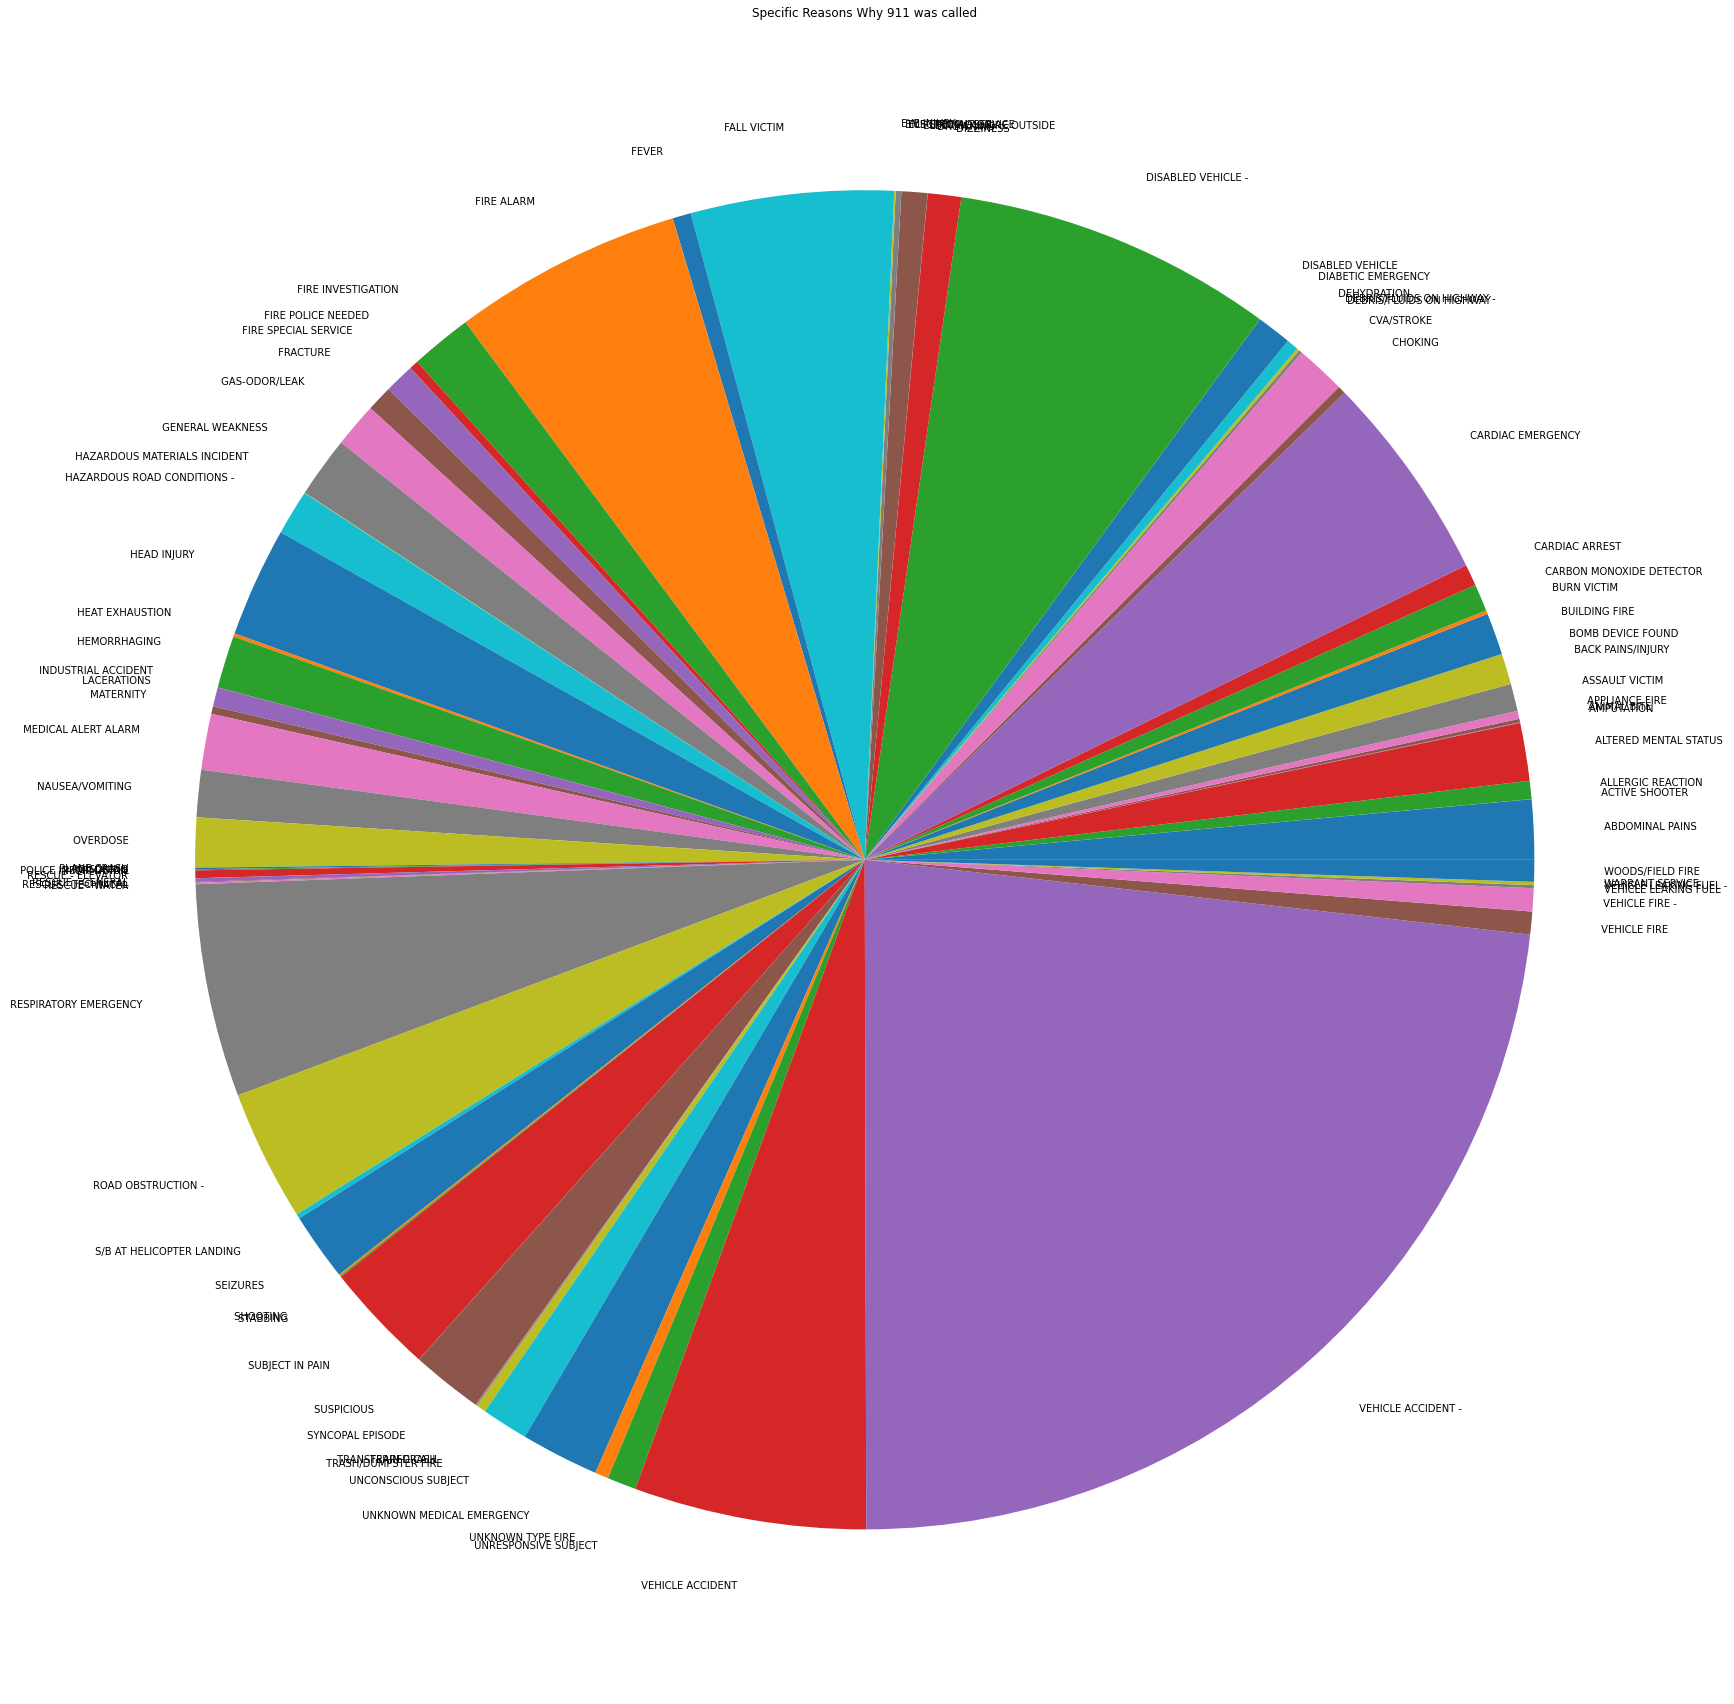

In [49]:
df1.plot.pie(label = "", title = "Specific Reasons Why 911 was called",figsize = (30,35))# Pie chart of reasons why 911 was called

In [50]:
# Determing the main reasons for calls in Abington
Abby = df.loc[df['twp'].isin(['ABINGTON'])]
Abby

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
95,40.083078,-75.101117,SHELMIRE ST & CEDAR RD; ABINGTON; 2015-12-10 @...,19027.0,Traffic: DISABLED VEHICLE -,2015-12-10 21:52:01,ABINGTON,SHELMIRE ST & CEDAR RD,1,DISABLED VEHICLE -
125,40.118594,-75.162653,PENN AVE & GARFIELD AVE; ABINGTON; Station 38...,19038.0,EMS: DIZZINESS,2015-12-11 02:12:02,ABINGTON,PENN AVE & GARFIELD AVE,1,DIZZINESS
129,40.107400,-75.113206,THE FAIRWAY & RYDAL RD; ABINGTON; Station 38...,19046.0,EMS: RESPIRATORY EMERGENCY,2015-12-11 03:12:02,ABINGTON,THE FAIRWAY & RYDAL RD,1,RESPIRATORY EMERGENCY
165,40.107400,-75.113206,THE FAIRWAY & RYDAL RD; ABINGTON; Station 38...,19046.0,EMS: HEMORRHAGING,2015-12-11 07:36:01,ABINGTON,THE FAIRWAY & RYDAL RD,1,HEMORRHAGING
170,40.121176,-75.133361,SUSQUEHANNA RD & EASTON RD; ABINGTON; 2015-12-...,19001.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 08:07:01,ABINGTON,SUSQUEHANNA RD & EASTON RD,1,VEHICLE ACCIDENT -
...,...,...,...,...,...,...,...,...,...,...
99428,40.121207,-75.133414,EASTON RD & SUSQUEHANNA RD; ABINGTON; 2016-08-...,19001.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 08:01:02,ABINGTON,EASTON RD & SUSQUEHANNA RD,1,VEHICLE ACCIDENT -
99447,40.121341,-75.133677,SUSQUEHANNA RD; ABINGTON; Station 382; 2016-0...,NaN,EMS: VEHICLE ACCIDENT,2016-08-24 09:01:03,ABINGTON,SUSQUEHANNA RD,1,VEHICLE ACCIDENT
99448,40.114547,-75.121755,SUSQUEHANNA RD & OLD YORK RD; ABINGTON; 2016-0...,19001.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 09:01:04,ABINGTON,SUSQUEHANNA RD & OLD YORK RD,1,VEHICLE ACCIDENT -
99449,40.115148,-75.122839,SUSQUEHANNA RD & CHURCH ST; ABINGTON; Station...,19001.0,EMS: VEHICLE ACCIDENT,2016-08-24 09:06:02,ABINGTON,SUSQUEHANNA RD & CHURCH ST,1,VEHICLE ACCIDENT


In [51]:
# Creates a dataframe with only Abington as the twp
Abby['Main_Reason'] = Abby['title'].apply(lambda reasons: reasons.split(':')[0]) 

C:\Users\Super\AppData\Local\Temp\ipykernel_23148\3617280441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Abby['Main_Reason'] = Abby['title'].apply(lambda reasons: reasons.split(':')[0])


In [52]:
Abby

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Main_Reason
95,40.083078,-75.101117,SHELMIRE ST & CEDAR RD; ABINGTON; 2015-12-10 @...,19027.0,Traffic: DISABLED VEHICLE -,2015-12-10 21:52:01,ABINGTON,SHELMIRE ST & CEDAR RD,1,DISABLED VEHICLE -,Traffic
125,40.118594,-75.162653,PENN AVE & GARFIELD AVE; ABINGTON; Station 38...,19038.0,EMS: DIZZINESS,2015-12-11 02:12:02,ABINGTON,PENN AVE & GARFIELD AVE,1,DIZZINESS,EMS
129,40.107400,-75.113206,THE FAIRWAY & RYDAL RD; ABINGTON; Station 38...,19046.0,EMS: RESPIRATORY EMERGENCY,2015-12-11 03:12:02,ABINGTON,THE FAIRWAY & RYDAL RD,1,RESPIRATORY EMERGENCY,EMS
165,40.107400,-75.113206,THE FAIRWAY & RYDAL RD; ABINGTON; Station 38...,19046.0,EMS: HEMORRHAGING,2015-12-11 07:36:01,ABINGTON,THE FAIRWAY & RYDAL RD,1,HEMORRHAGING,EMS
170,40.121176,-75.133361,SUSQUEHANNA RD & EASTON RD; ABINGTON; 2015-12-...,19001.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 08:07:01,ABINGTON,SUSQUEHANNA RD & EASTON RD,1,VEHICLE ACCIDENT -,Traffic
...,...,...,...,...,...,...,...,...,...,...,...
99428,40.121207,-75.133414,EASTON RD & SUSQUEHANNA RD; ABINGTON; 2016-08-...,19001.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 08:01:02,ABINGTON,EASTON RD & SUSQUEHANNA RD,1,VEHICLE ACCIDENT -,Traffic
99447,40.121341,-75.133677,SUSQUEHANNA RD; ABINGTON; Station 382; 2016-0...,NaN,EMS: VEHICLE ACCIDENT,2016-08-24 09:01:03,ABINGTON,SUSQUEHANNA RD,1,VEHICLE ACCIDENT,EMS
99448,40.114547,-75.121755,SUSQUEHANNA RD & OLD YORK RD; ABINGTON; 2016-0...,19001.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 09:01:04,ABINGTON,SUSQUEHANNA RD & OLD YORK RD,1,VEHICLE ACCIDENT -,Traffic
99449,40.115148,-75.122839,SUSQUEHANNA RD & CHURCH ST; ABINGTON; Station...,19001.0,EMS: VEHICLE ACCIDENT,2016-08-24 09:06:02,ABINGTON,SUSQUEHANNA RD & CHURCH ST,1,VEHICLE ACCIDENT,EMS


<AxesSubplot:xlabel='Main_Reason', ylabel='count'>

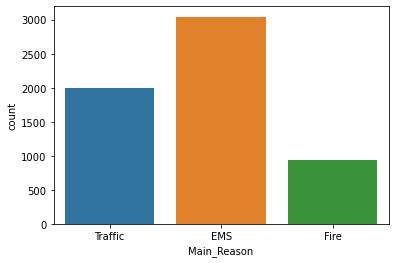

In [55]:
#Countplot describing the main reasons why 911 was called in Abby
sns.countplot(x = 'Main_Reason', data = Abby)

In [57]:
# Making a dataframe for the top 5 towns with the greatest amount of 911 calls and comparing them
df['twp'].value_counts().head(5)# finding the top 5

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [58]:
towns_with_greatest_police_calls = df.loc[df['twp'].isin(['ABINGTON', 
                                                          'LOWER MERION', 
                                                          'NORRISTOWN', 
                                                          'UPPER MERION', 
                                                          'CHELTENHAM'])]
towns_with_greatest_police_calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,VEHICLE ACCIDENT -
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,VEHICLE ACCIDENT -
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:47:01,NORRISTOWN,PENN ST & ARCH ST,1,VEHICLE ACCIDENT
...,...,...,...,...,...,...,...,...,...,...
99472,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: CARDIAC EMERGENCY,2016-08-24 10:22:00,NORRISTOWN,PINE ST & W ROBERTS ST,1,CARDIAC EMERGENCY
99483,40.084465,-75.390173,DEKALB PIKE & KING OF PRUSSIA RD; UPPER MERIO...,19406.0,EMS: BACK PAINS/INJURY,2016-08-24 10:57:00,UPPER MERION,DEKALB PIKE & KING OF PRUSSIA RD,1,BACK PAINS/INJURY
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,VEHICLE ACCIDENT -
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,VEHICLE ACCIDENT -


<AxesSubplot:xlabel='twp', ylabel='count'>

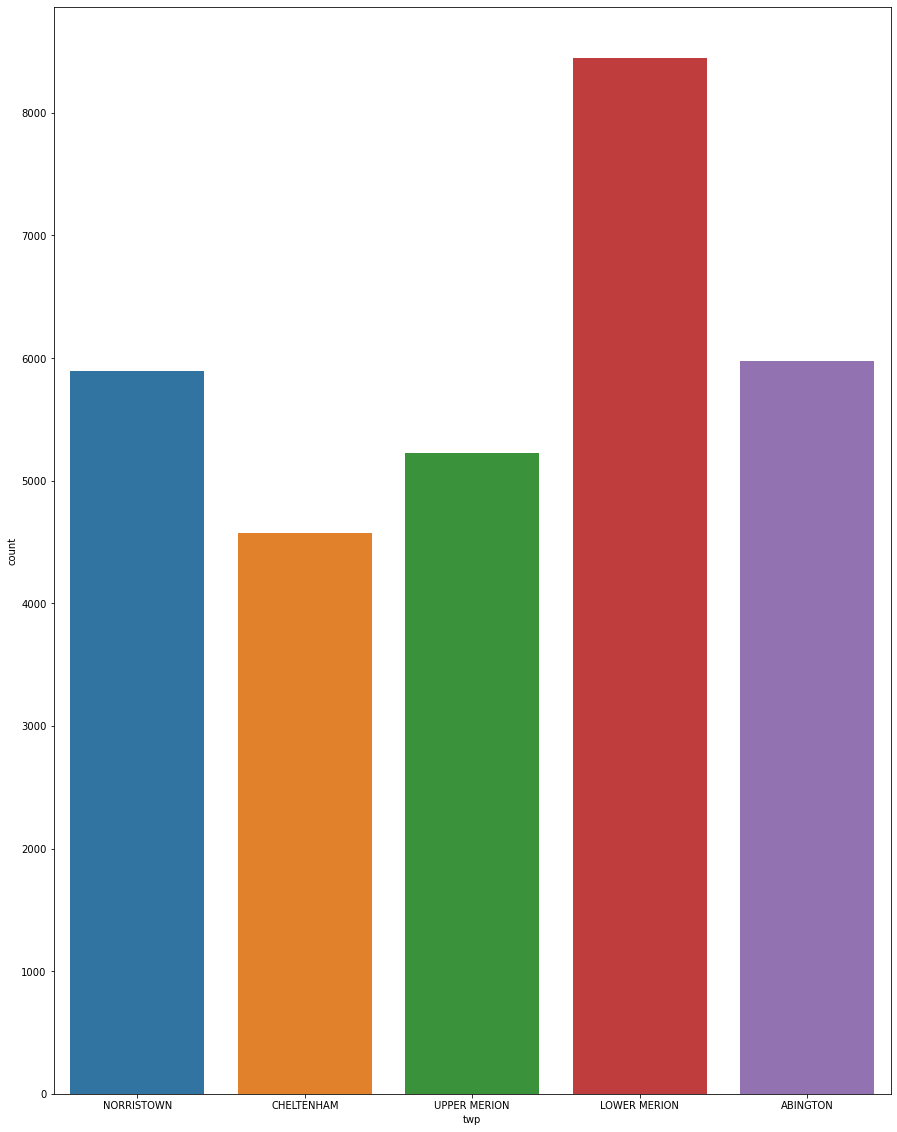

In [61]:
# Count plot comparing the amount of calls between the towns with the greatest amount of calls
fig, ax = plt.subplots(figsize = (15,20))
sns.countplot(x = 'twp', data = towns_with_greatest_police_calls, ax = ax)

In [62]:
# Counting the amount of 911 calls in Norristown by month 
# Using Pd.time to add month, day, and day of week
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]


In [63]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [64]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [65]:
df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])

In [67]:
# Creating a dataframe with only Norristown as the twp
police_calls_in_norristown = df.loc[df['twp'].isin(['NORRISTOWN'])]
police_calls_in_norristown

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,17,12,Thu
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:47:01,NORRISTOWN,PENN ST & ARCH ST,1,VEHICLE ACCIDENT,17,12,Thu
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:47:02,NORRISTOWN,PENN ST & ARCH ST,1,VEHICLE ACCIDENT -,17,12,Thu
32,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-10 18:22:00,NORRISTOWN,PINE ST & W ROBERTS ST,1,UNKNOWN MEDICAL EMERGENCY,18,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99465,40.114928,-75.340307,AIRY ST & GREEN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: RESPIRATORY EMERGENCY,2016-08-24 09:56:13,NORRISTOWN,AIRY ST & GREEN ST,1,RESPIRATORY EMERGENCY,9,8,Wed
99469,40.123868,-75.341678,MARKLEY ST & JAMES ST; NORRISTOWN; 2016-08-24 ...,19401.0,Fire: FIRE ALARM,2016-08-24 10:12:01,NORRISTOWN,MARKLEY ST & JAMES ST,1,FIRE ALARM,10,8,Wed
99472,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: CARDIAC EMERGENCY,2016-08-24 10:22:00,NORRISTOWN,PINE ST & W ROBERTS ST,1,CARDIAC EMERGENCY,10,8,Wed
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,VEHICLE ACCIDENT -,11,8,Wed


In [69]:
# Seperating everything by month
byMonth = police_calls_in_norristown.groupby(by='Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,803,803,803,771,803,803,803,798,803,803,803,803
2,630,630,630,596,630,630,630,629,630,630,630,630
3,732,732,732,697,732,732,732,731,732,732,732,732
4,728,728,728,695,728,728,728,726,728,728,728,728
5,655,655,655,625,655,655,655,655,655,655,655,655
6,673,673,673,639,673,673,673,672,673,673,673,673
7,723,723,723,679,723,723,723,723,723,723,723,723
8,494,494,494,475,494,494,494,493,494,494,494,494
12,452,452,452,433,452,452,452,450,452,452,452,452


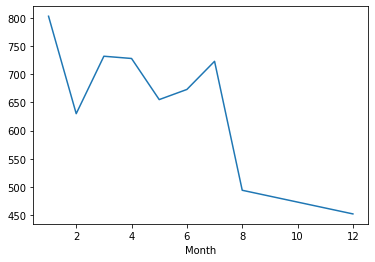

In [72]:
# Amount of times 911 was called in Norristown each month
byMonth['lat'].plot()
plt.ylabel = 'Count'